['', '본문 내용', '', 'TV플레이어', '', '// TV플레이어', '', '// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}', '', '후임 당선인 대변인에 배현진', '윤석열 대통령 당선인 측은 “내일 임시 국무회의서 대통령집무실 용산 이전을 위한 예비비가 처리될 것”이라고 말했다. 경기지사 출마설이 나오는 김은혜 당선인 대변인은 이날 대변인직을 사임했다.', '지난 4일 서울 종로구 통의동 제20대 대통령직인수위원회에서 브리핑 중인 김은혜 대통령 당선인 대변인. 연합뉴스', '김 대변인은 5일 오전 서울 종로구 통의동 대통령직인수위원회에서 브리핑을 하고 “대통령 집무실 이전을 위한 예비비는 청와대가 내일이나 모레 임시국무회의에 상정해 처리하는 것으로 전해 들었다. 협조가 잘 되는 것으로 알고 있다”고 말했다. 청와대가 이전비용 496억 원 전체가 아니라 일부만 상정할 수 있느냐는 질문에 대해서는 “문재인 대통령과 윤 당선인의 만찬 이후 큰 틀에서 협조가 이뤄지고 있다. 큰 우려 안 하셔도 될 것 같다. 상호간의 신뢰를 원칙으로 한 소통이 중요하다”고 덧붙였다.', '김 대변인은 브리핑 말미에 “제 신상 문제에 대해 말씀드리겠다. 오늘이 당선인 대변인으로서는 마지막 브리핑이다. 지방선거 출마 결심은 완전히 서지 않았지만 조만간 결심을 밝히겠다. 제 후임은 배현진 대변인이다”고 말했다. 김 대변인은 윤 당선인의 후보 시절부터 대변인과 공보단장을 맡았다. 대선 기간에는  ‘대장동 저격수’로 나서 더불어민주당 이재명 전 대선후보 공격에 앞장섰다. 김 대변인의 지역구는 대장동이 있는 성남 분당갑이다.', '// 본문 내용', '']
['', '본문 내용', '', 'TV플레이어', '', '// TV플레이어', '', '// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}', '', '후임 당선인 대변인에 배현진', '윤석열 

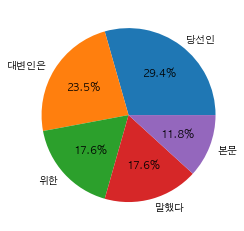

In [48]:
import urllib.request # 웹에 통신 데이터를 요청하는 모듈
from bs4 import BeautifulSoup #html 파싱 해주는 기능

url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=658&aid=0000006144'
res = urllib.request.urlopen(url)
data = res.read() 
html = data.decode("euc-kr")
soup = BeautifulSoup(html,"html.parser") #html 문서를 html소스로 파싱

lst = soup.select_one('#articleBodyContents')
craw_data = []
i = 0
for data in lst:
    if data.string:
        craw_data.append(data.string.strip())
        i+=1 
print(craw_data)


                                      
#=====================================기사크롤링=================================================


import pickle
# 저장
with open('data/data.pickle','wb')as file:
    pickle.dump(craw_data,file)
    
# 로드 
with open("data/data.pickle",'rb')as file:
    craw_data = pickle.load(file) 
print(craw_data) 

#=====================================피클에 저장과 로드=================================================


import re
def clean_text(text_string):
    # 문장부호를 제거
    text_string_re = re.sub(
    '[,.?!:\'|\"]',
        ' ',
        text_string)      # sub(패턴, 변경단어, 변경할 자료) 
    # 특수문자, 숫자 제거
    text_string_re = re.sub(
        '[!@#$%^&*()/]|[0-9]',
        '',
        text_string_re)
    # 영문 소문자 -> 영문 제거
    text_string_re = text_string_re.lower()
    text_string_re = re.sub('[a-z]','',text_string_re)
    # 공백 제거 
    text_string_re = ' '.join(text_string_re.split())
    
    return text_string_re
# 텍스트 전처리 함수 호출
clean_texts = [clean_text(row)for row in craw_data]
print(">>텍스트 전처리 결과<<")
print(clean_texts)
print

#====================================텍스트 전처리============================================


# word count
word_count = {}
for text in clean_texts: # 텍스트 -> 문장
    for word in text.split(): # 문장 -> 단어
        word_count[word] = word_count.get(word,0)+1
print("word count")
print(word_count) 

# 단어 전처리 

# 3회이상 출력 단어 & 2~4자 단어 지정
new_word_ct = {}
for word,cnt in word_count.items():
    if cnt >=2 and len(word)>=2 and len(word) < 5:
        print(word,'-->',word_count[word])
        new_word_ct[word] = new_word_ct.get(word,cnt)
print(">>단어 전처리<<")
print(new_word_ct)
#===================================단어 전처리================================================



## top word counter
from collections import Counter # 모듈을 추가
counter = Counter(new_word_ct)
top5_word = counter.most_common(5) # top5 
print(">>top 5<<")
print(top5_word)

#=====================================top5 추출=================================================


words =[]
counts = [] 
for word, count in top5_word:
    words.append(word)
    counts.append(count)
print(words,counts)
#=====================================빈도수 추출=================================================

import sqlite3
try:
    # DB연동및 쿼리 작업
    conn = sqlite3.connect('data/word_count') # db생성 -> 연결 객체생성 
    
    # sql실행 객체 
    cursor = conn.cursor()
    
    # 테이블 생성
    sql = 'create table if not exists test_table (words text(20), counts NUMBERIC(10))'
    cursor.execute(sql)
    cursor.execute("insert into test_table values('당선인',5)")
    cursor.execute("insert into test_table values('대변인은',4)")
    cursor.execute("insert into test_table values('위한',3)")
    cursor.execute("insert into test_table values('말했다',3)")
    cursor.execute("insert into test_table values('본문',2)")
    conn.commit()
    
except Exception as e:
    print("db 연동 에러:",e)
    conn.rollback()
finally:
    cursor.close()
    conn.close()
#=====================================데이터 연동=================================================    


import matplotlib.pyplot as plt
from matplotlib import rc

#맥북용
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.pie(counts,labels=words, autopct='%.1f%%')
plt.show()



#===================================자료시각화================================================